In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# import data
infile = '../../kuroshio_productivity/data/jma_nitrate.csv'
data = pd.read_csv(infile, sep=',')

print(data.columns)
subset = data[(data.nitrate>=0) & (data.depth < 10)]

Index(['Unnamed: 0', 'theta', 'sal', 'depth', 'nitrate', 'lon', 'lat', 'date',
       'year', 'month', 'day', 'profile', 'cruise', 'vessel', 'density'],
      dtype='object')


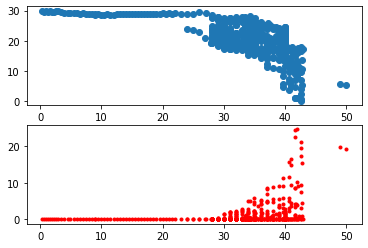

In [3]:
plt.subplot(2,1,1)
plt.plot(subset.lat, subset.theta, 'o')
plt.subplot(2,1,2)
plt.plot(subset.lat, subset.nitrate, '.r')




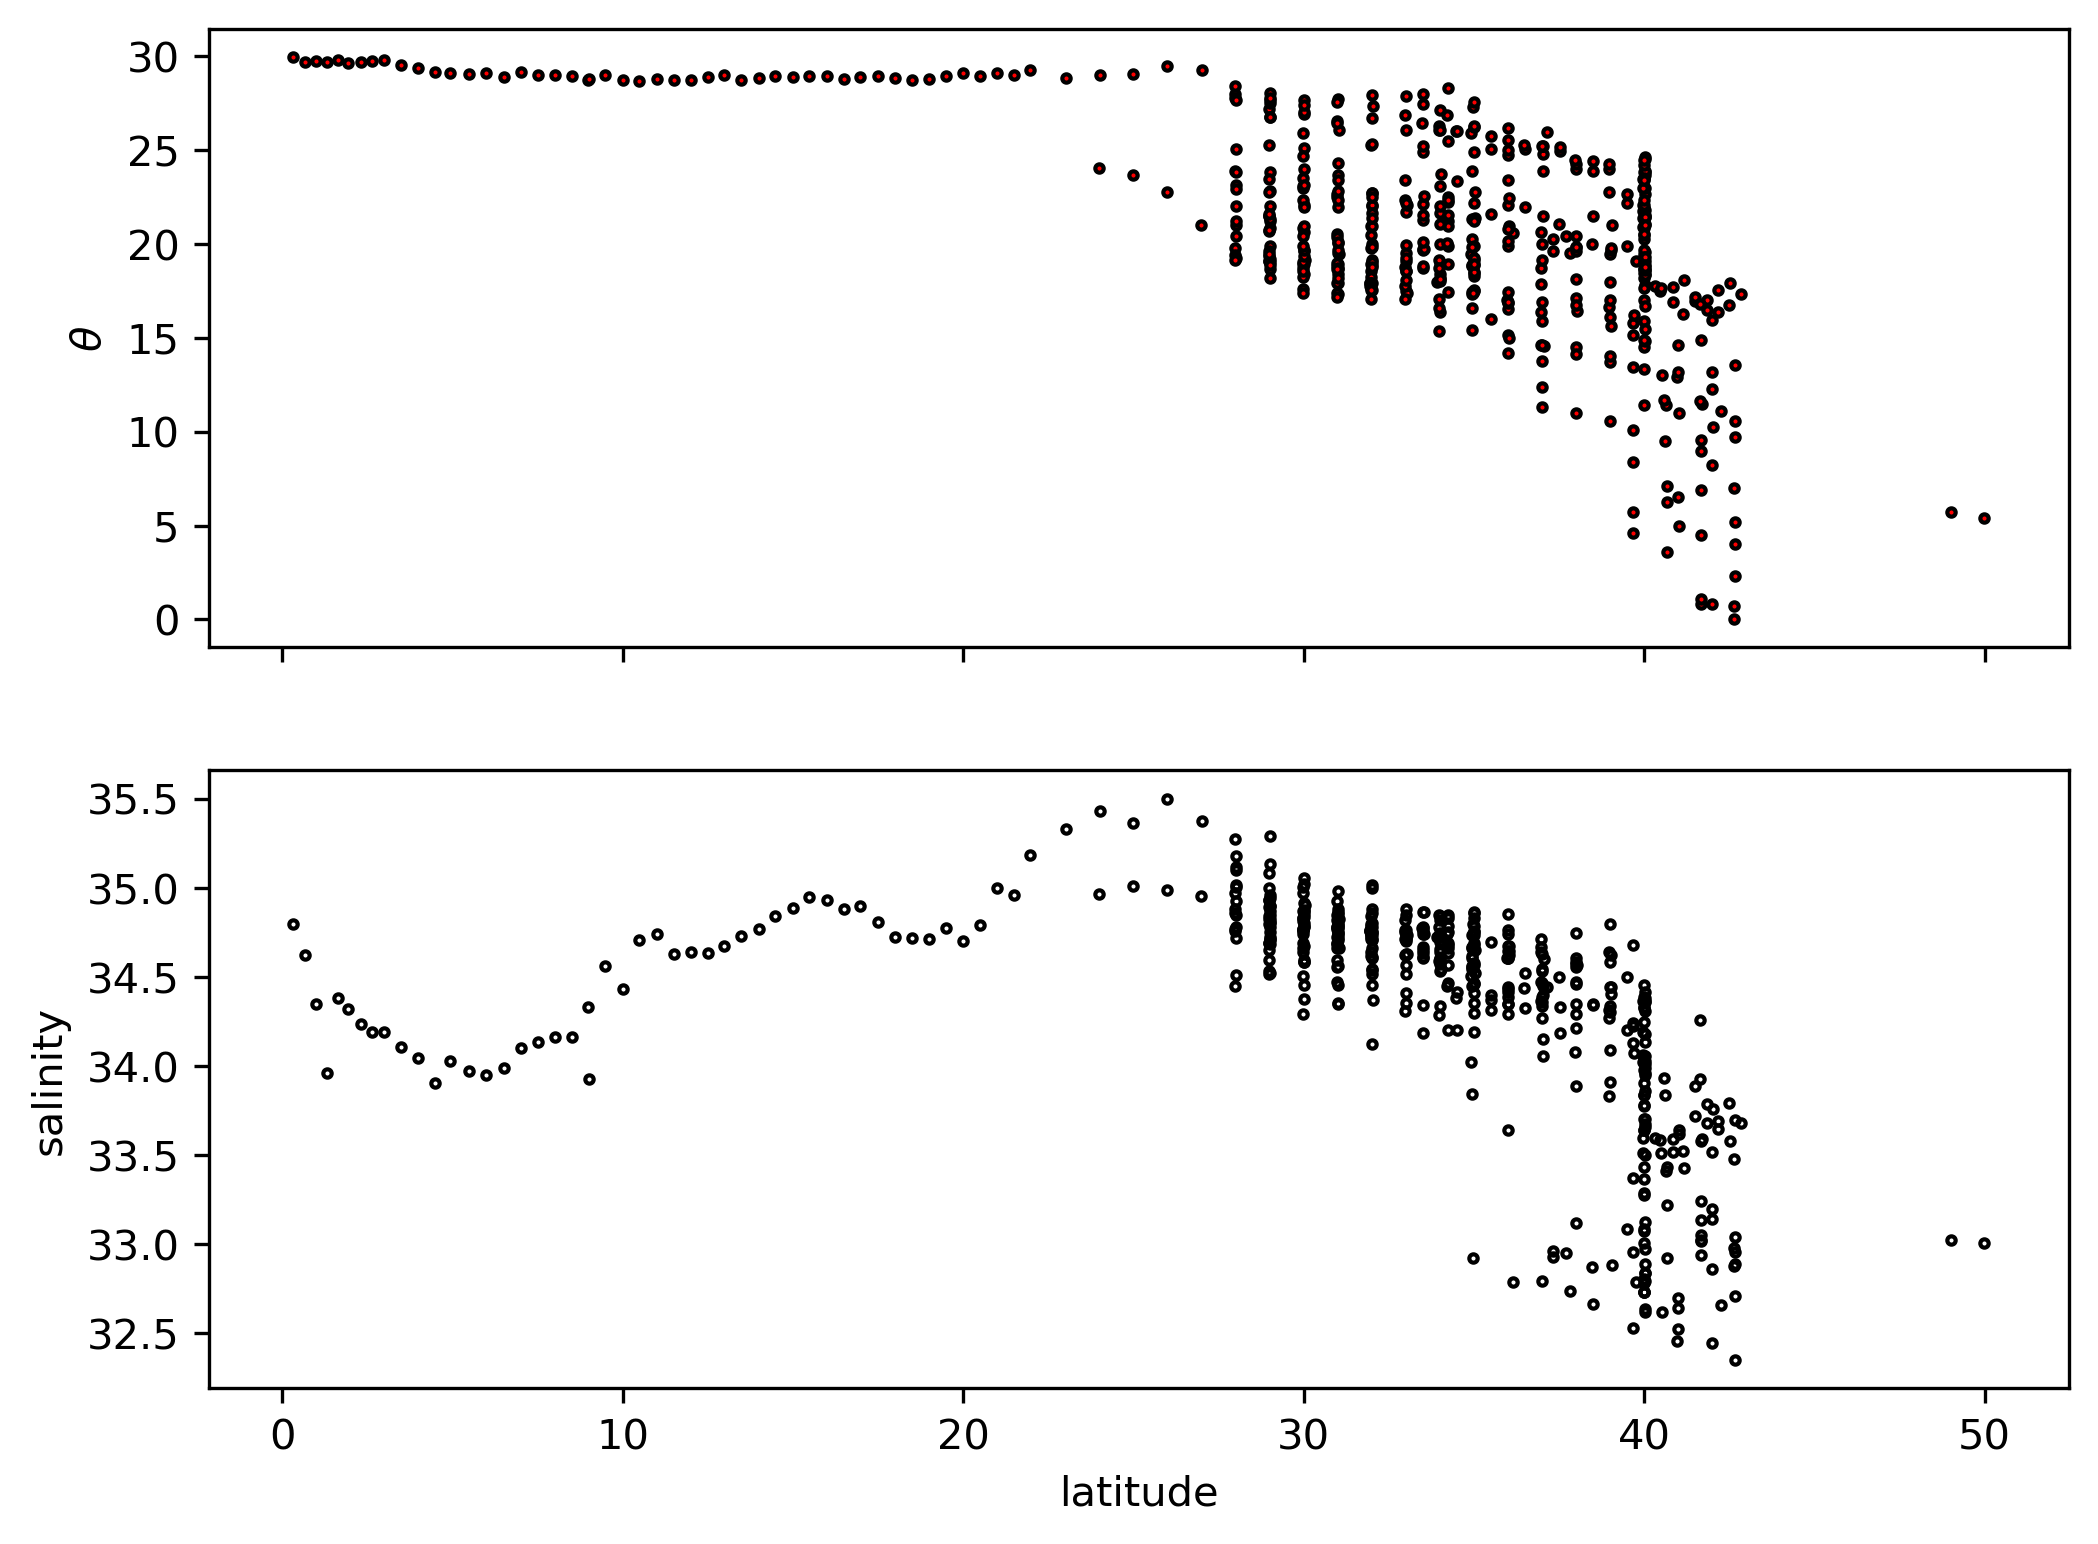

In [4]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize = (8,6), dpi = 300, sharex = 'all')

ax1.plot(subset.lat, subset.theta, 'ok', markersize = 2, markerfacecolor = 'r')
ax1.set_ylabel(r'$\theta$')

ax2.plot(subset.lat, subset.sal, 'ok', markersize = 2, markerfacecolor = 'None')
ax2.set_ylabel(r'salinity')
ax2.set_xlabel('latitude')

plt.show()

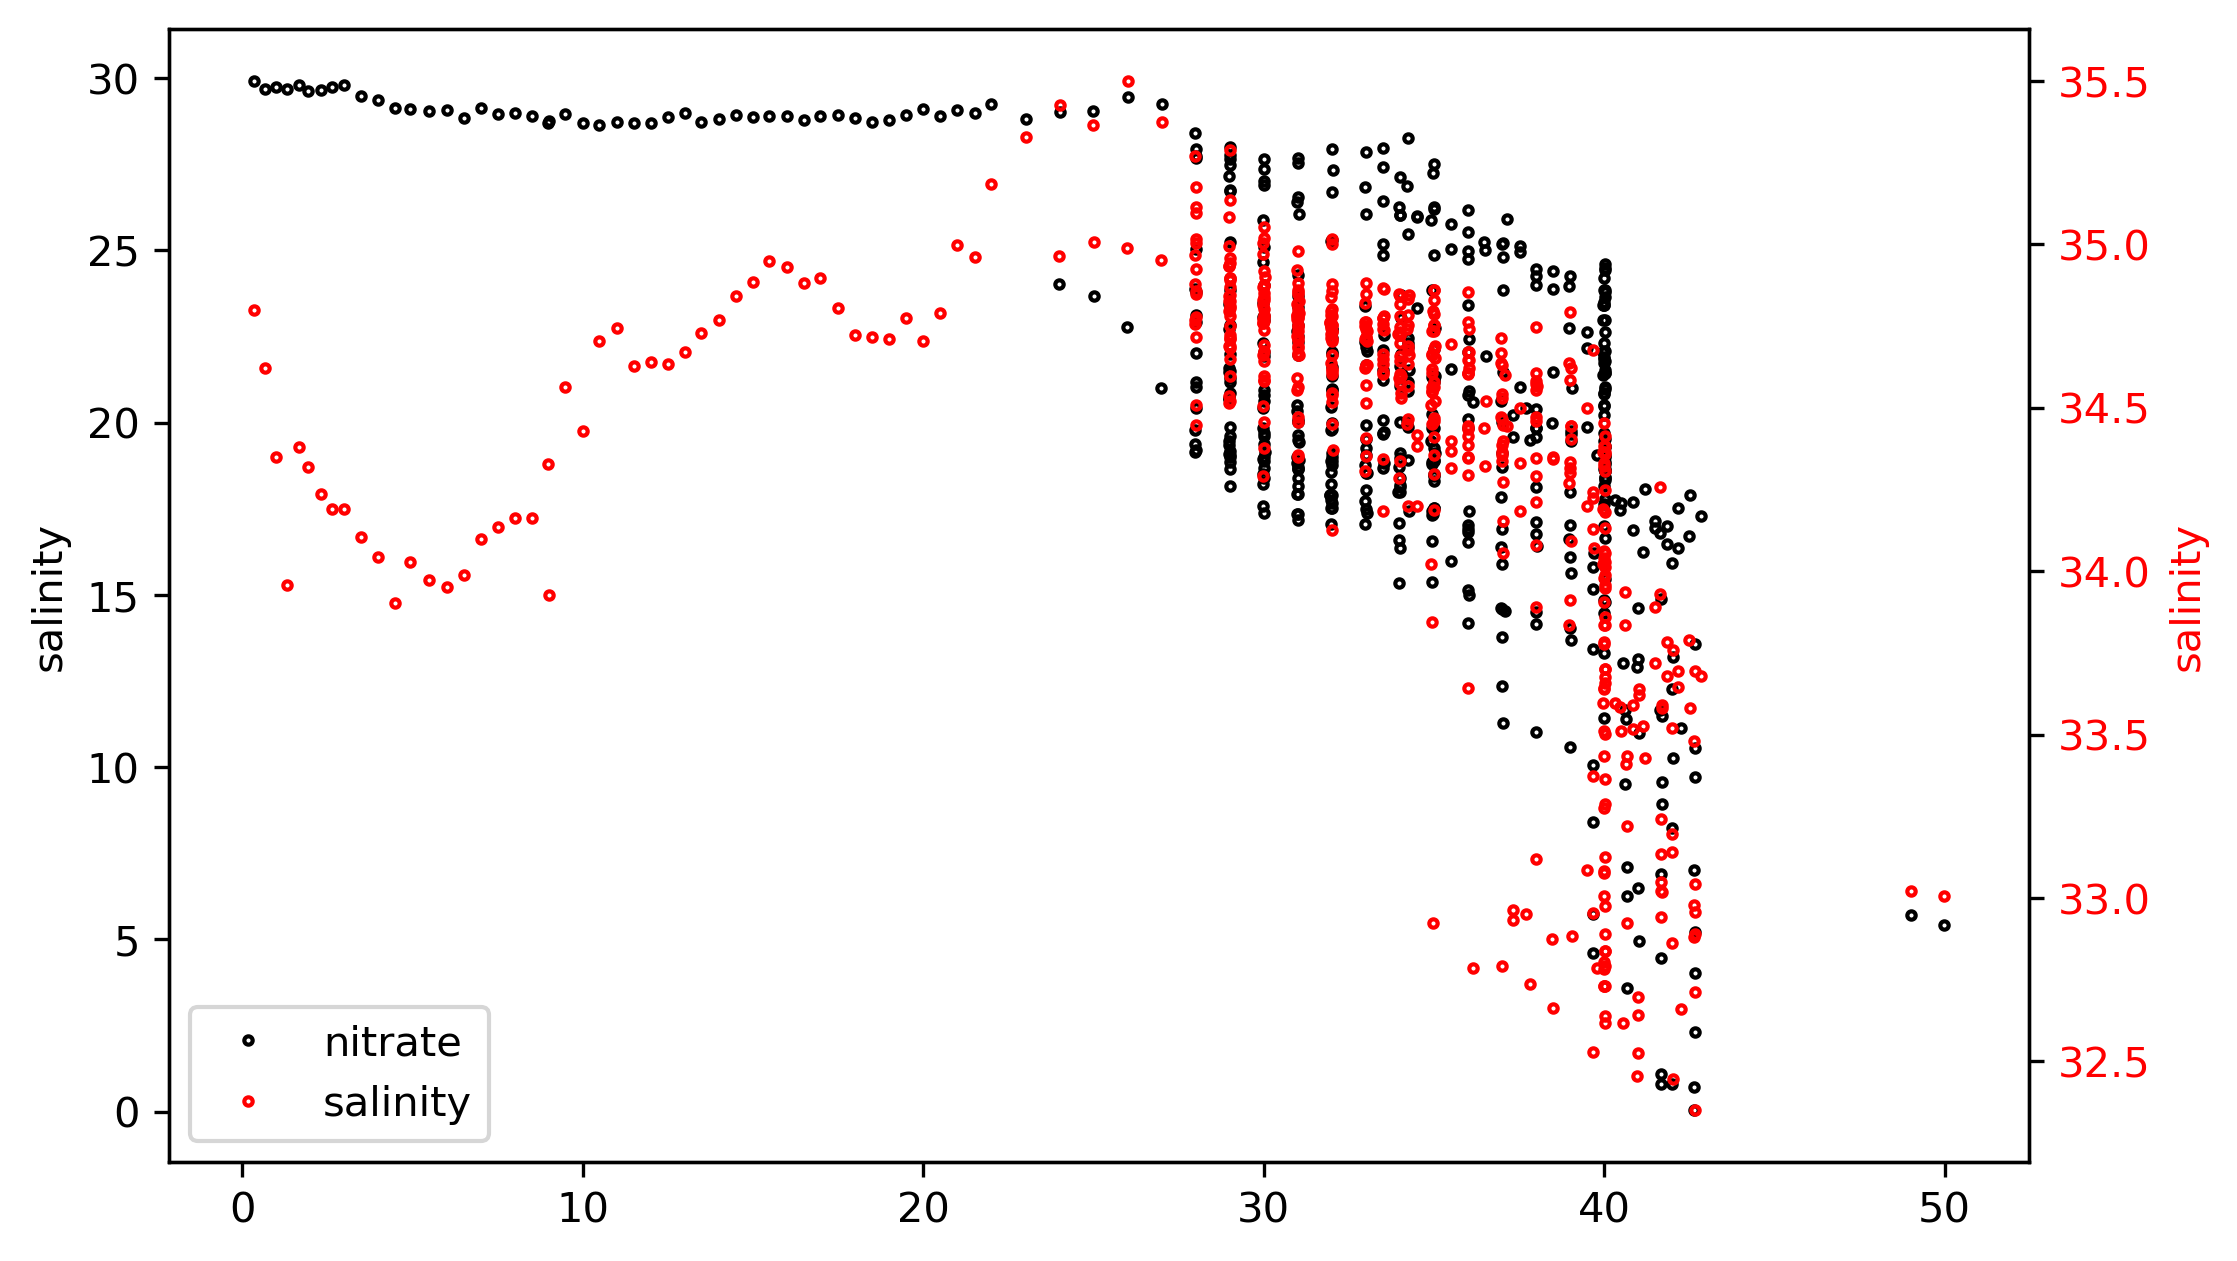

In [5]:
# plot both variables on the same plot

fig, ax1 = plt.subplots(figsize = (8,5), dpi = 300, sharex = 'all')
ax2 = ax1.twinx()

l1 = ax1.plot(subset.lat, subset.theta, 'ok', markersize = 2, markerfacecolor = 'None', label = 'nitrate')
ax1.set_ylabel(r'salinity', color = 'k')
ax1.tick_params(axis='y', labelcolor='k')


l2 = ax2.plot(subset.lat, subset.sal, 'or', markersize = 2, markerfacecolor = 'None', label = 'salinity')
ax2.set_ylabel(r'salinity', color = 'red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_xlabel('latitude')

lns = l1+l2
labs = [l.get_label() for l in lns]

ax1.legend(lns, labs,loc = 'lower left')

# try adding a third axis and plot temperature too

#https://matplotlib.org/examples/axes_grid/demo_parasite_axes2.html

#### Whenever you are generating plots to go into a paper or a presentation, there are a few things you can do to make sure that everyone can understand your plots.

* Always make sure your text is large enough to read. Use the `fontsize` parameter in `xlabel`, `ylabel`, `title`, and `legend`, and `tick_params` with `labelsize` to increase the text size of the numbers on your axes.

* Similarly, you should make your graph elements easy to see. Use `s` to increase the size of your scatterplot markers and `linewidth` to increase the sizes of your plot lines.

* Using color (and nothing else) to distinguish between different plot elements will make your plots unreadable to anyone who is colorblind, or who happens to have a black-and-white office printer. For lines, the `linestyle` parameter lets you use different types of lines. For scatterplots, `marker` lets you change the shape of your points. If you’re unsure about your colors, you can use [Coblis](https://www.color-blindness.com/coblis-color-blindness-simulator/) or [Color Oracle](https://colororacle.org/) to simulate what your plots would look like to those with colorblindness.